In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
titanixdata = pd.read_csv('input/train.csv')
titanixdata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
titanixdata.sample(100, random_state=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
590,591,0,3,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.1250,NaN,S
131,132,0,3,"Coelho, Mr. Domingos Fernandeo",male,20.0,0,0,SOTON/O.Q. 3101307,7.0500,NaN,S
628,629,0,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.5500,NaN,S
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S
768,769,0,3,"Moran, Mr. Daniel J",male,NaN,1,0,371110,24.1500,NaN,Q
781,782,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,17474,57.0000,B20,S


In [15]:
titanixdata.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..     

In [16]:
titanixdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:

#titanixdata.drop(titanixdata['PassengerId'].loc[(titanixdata['Embarked'].isnull())]-1, axis=0, inplace=True)
#titanixdata['Embarked'].isnull().any()
#titanixdata.loc[(titanixdata['Embarked'].isnull())]
#titanixdata['PassengerId'].loc[(titanixdata['Embarked'].isnull())]


In [18]:
titanixdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
def age_nans(value):
    result = value
    if pd.isna(value):
        result = 29

    return result

titanixdata['Age'] = titanixdata['Age'].map(age_nans)
titanixdata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
titanixdata['Age'].describe()

count    891.000000
mean      29.560236
std       13.005010
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
titanixdata['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 29.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [22]:
titanixdata['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [23]:


def fix_cabin(value):
    if pd.isna(value):
        return 3
    #if value.contains('A'):
        #return 1
    if value[0] == 'A':
        return 1
    if value[0] == 'B':
        return 2
    if value[0] == 'C':
        return 3
    if value[0] == 'D':
        return 4
    if value[0] == 'E':
        return 5
    if value[0] == 'F':
        return 6
    if value[0] == 'G':
        return 7
    if value[0] == 'T':
        return 8
    return 0

titanixdata['Cabin'] = titanixdata['Cabin'].map(fix_cabin)
titanixdata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,3,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,3,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,3,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,3,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,3,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,3,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,2,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,3,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,3,C


In [24]:
titanixdata['Cabin'].describe()

count    891.000000
mean       3.089787
std        0.724233
min        1.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        8.000000
Name: Cabin, dtype: float64

In [25]:
titanixdata['Cabin'].unique()

array([3, 5, 7, 4, 1, 2, 6, 8], dtype=int64)

In [26]:
titanixdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [27]:
if titanixdata['Cabin'].dtype != 'object':
    titanixdata['Cabin'] = titanixdata['Cabin'].astype(str)

if titanixdata['Cabin'].str.contains('A').any():
    print("Es gibt mindestens eine Kabine mit dem Buchstaben 'A'")
else:
    print("Es gibt keine Kabine mit dem Buchstaben 'A'")

Es gibt keine Kabine mit dem Buchstaben 'A'


In [28]:
titanixdata['Cabin'].unique()

array(['3', '5', '7', '4', '1', '2', '6', '8'], dtype=object)

In [29]:
titanixdata["Survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [30]:
titanixdata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.560236,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.005010,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.get_dataset_names()


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

<AxesSubplot: xlabel='Survived', ylabel='Sex'>

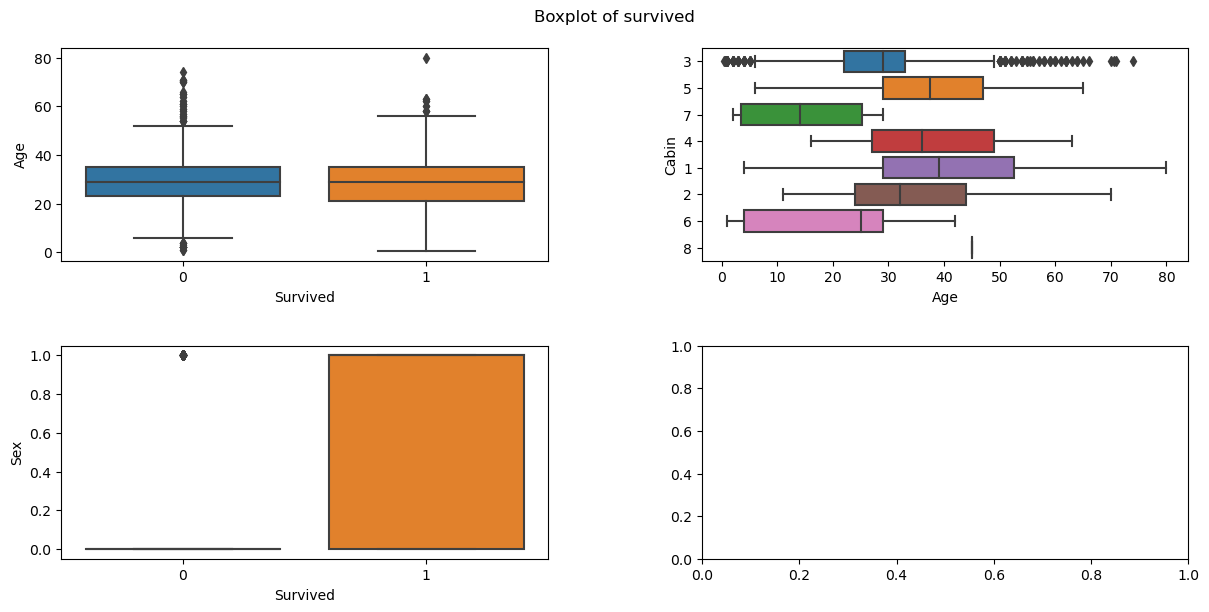

In [84]:
fig, axes= plt.subplots(2,2, figsize=(12, 6),) 
fig.suptitle('Boxplot of survived')
fig.tight_layout(h_pad=4, w_pad=8)
sns.boxplot(data=titanixdata, x='Survived', y='Age', ax=axes[0,0])
sns.boxplot(data=titanixdata, x='Age', y='Cabin',ax=axes[0, 1])
sns.boxplot(data=titanixdata, x='Survived', y='Sex',ax=axes[1, 0])


<AxesSubplot: xlabel='Survived', ylabel='Fare'>

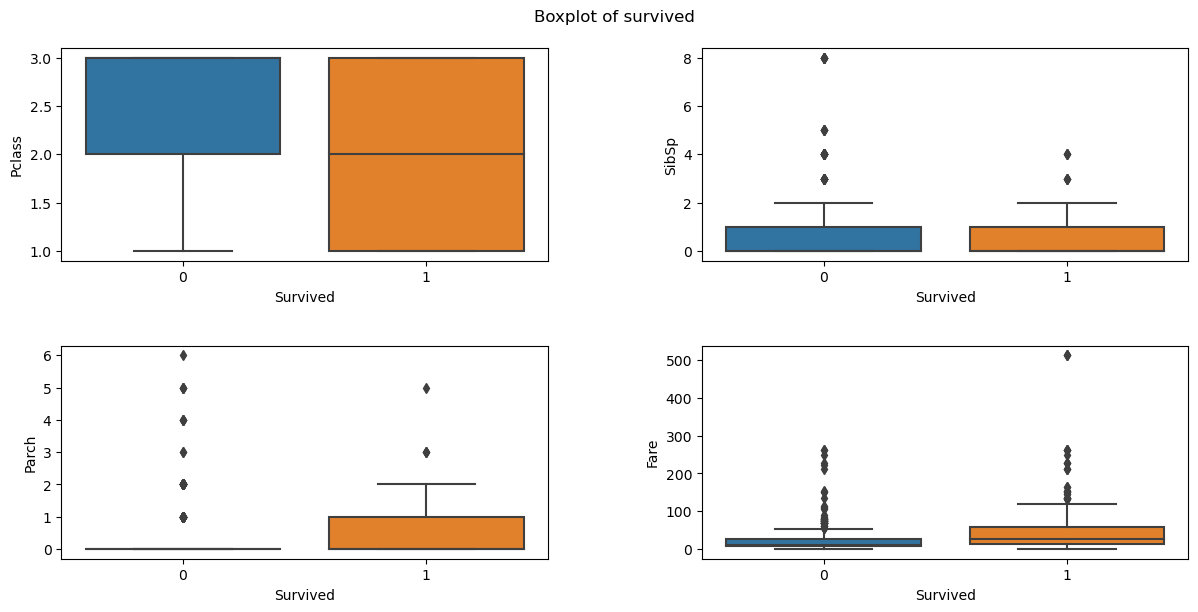

In [33]:
fig, axes= plt.subplots(2,2, figsize=(12, 6),) 
fig.suptitle('Boxplot of survived')
fig.tight_layout(h_pad=4, w_pad=8)
sns.boxplot(data=titanixdata, x='Survived', y='Pclass', ax=axes[0,0])
sns.boxplot(data=titanixdata, x='Survived', y='SibSp',ax=axes[0, 1])
sns.boxplot(data=titanixdata, x='Survived', y='Parch',ax=axes[1, 0])
sns.boxplot(data=titanixdata, x='Survived', y='Fare', ax=axes[1,1])

<AxesSubplot: xlabel='Age'>

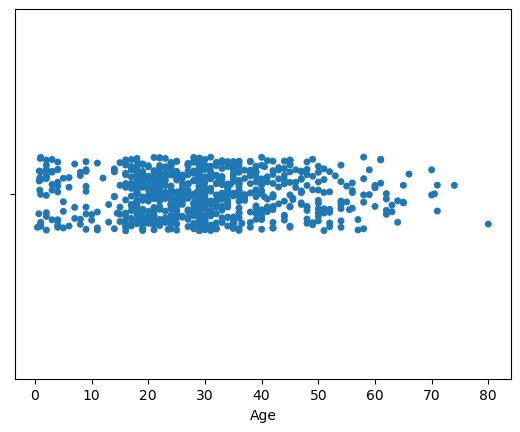

In [81]:
sns.stripplot(data=titanixdata, x='Age')

<AxesSubplot: xlabel='Survived', ylabel='Age'>

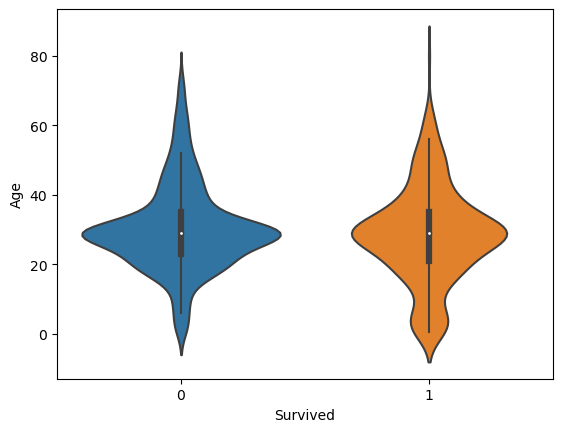

In [34]:
sns.violinplot(data=titanixdata, x='Survived', y='Age')

<AxesSubplot: xlabel='Survived', ylabel='Age'>

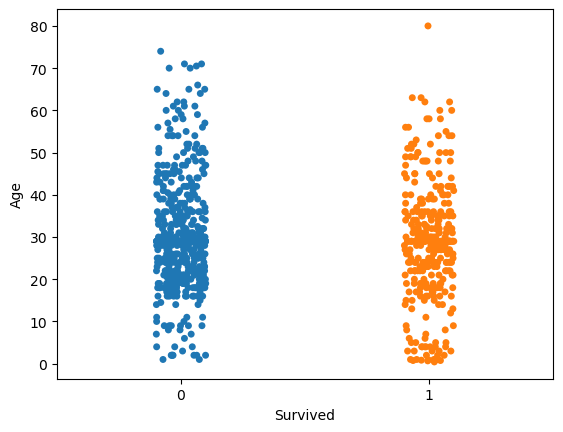

In [35]:
sns.stripplot(data=titanixdata, x='Survived', y='Age')

<AxesSubplot: xlabel='Survived', ylabel='Age'>

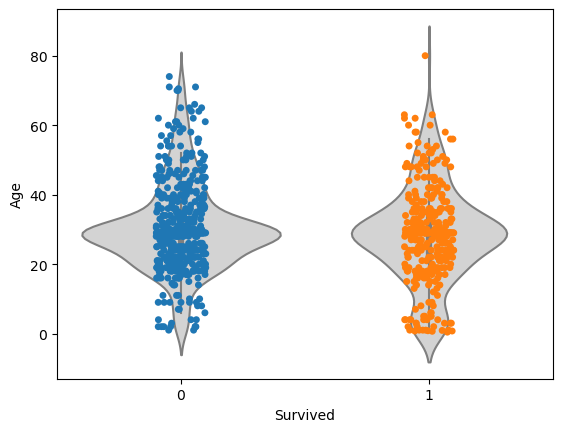

In [37]:
sns.violinplot(data=titanixdata, x='Survived', y='Age', color='lightgray')
sns.stripplot(data=titanixdata, x='Survived', y='Age')

C:\Users\fabsc\miniconda3\envs\leoenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\fabsc\miniconda3\envs\leoenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot: xlabel='Survived', ylabel='Age'>

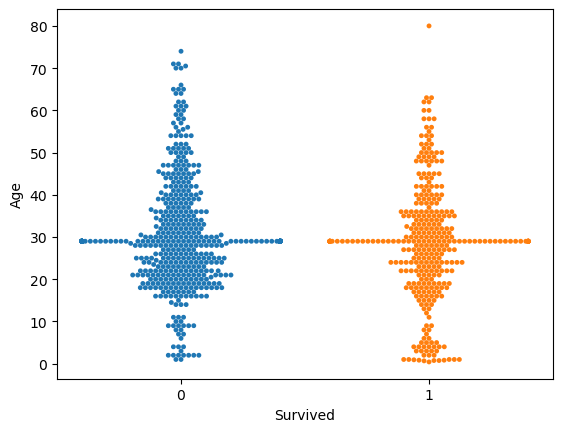

In [38]:
sns.swarmplot(data=titanixdata, x='Survived', y='Age',size=3.5)


<AxesSubplot: xlabel='Survived', ylabel='Count'>

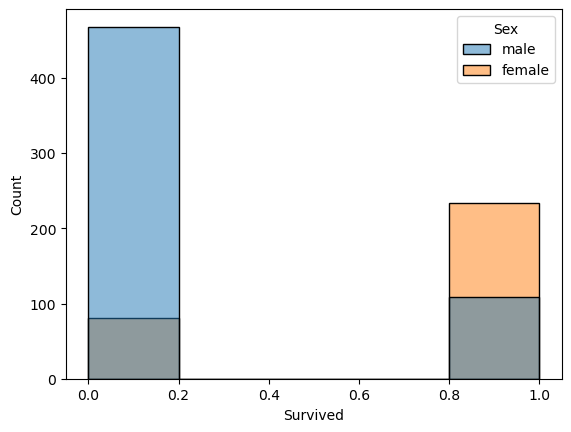

In [40]:
sns.histplot(data=titanixdata, x="Survived", hue='Sex', bins=5)

<AxesSubplot: xlabel='Cabin', ylabel='Count'>

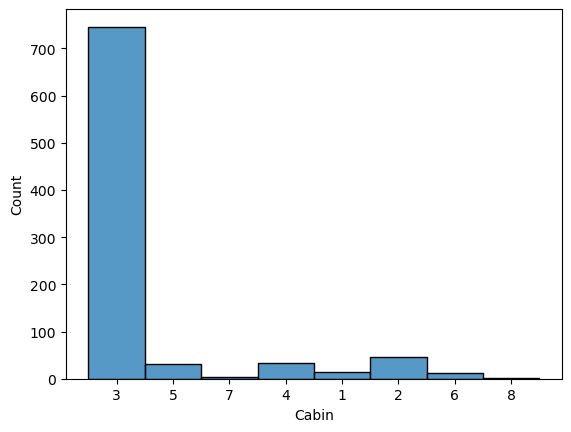

In [43]:
sns.histplot(data=titanixdata,  x='Cabin', bins=5)

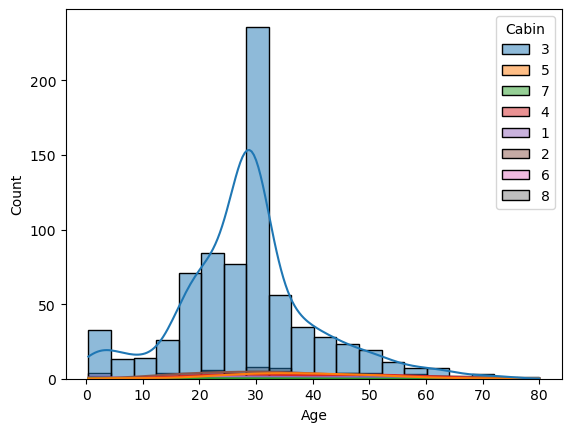

In [45]:
sns.histplot(data=titanixdata, x="Age", hue='Cabin', kde=True,bins=20);

<AxesSubplot: xlabel='Age', ylabel='Cabin'>

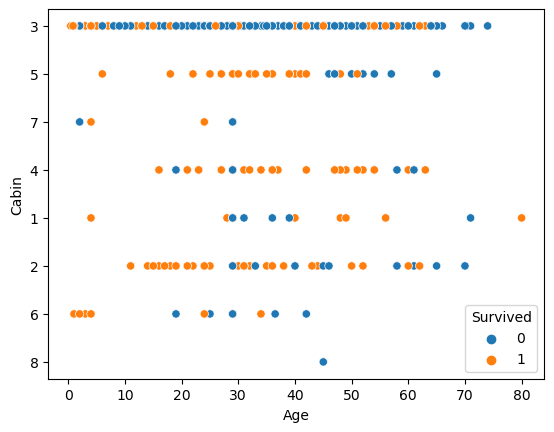

In [47]:
sns.scatterplot(data=titanixdata, x="Age", y="Cabin",hue='Survived')

<AxesSubplot: xlabel='Age', ylabel='Survived'>

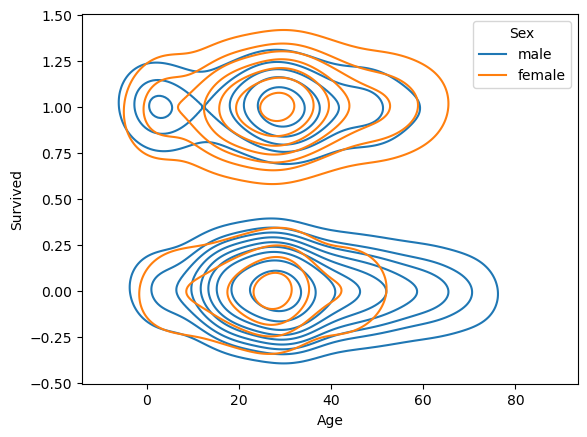

In [50]:
 sns.kdeplot(data=titanixdata, x='Age', y='Survived', hue='Sex')


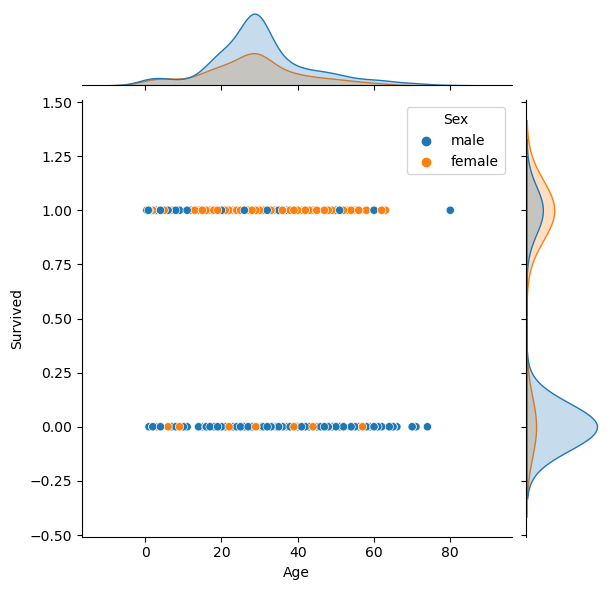

In [51]:
sns.jointplot(data=titanixdata, x='Age', y='Survived', hue='Sex')


<AxesSubplot: xlabel='Density', ylabel='Survived'>

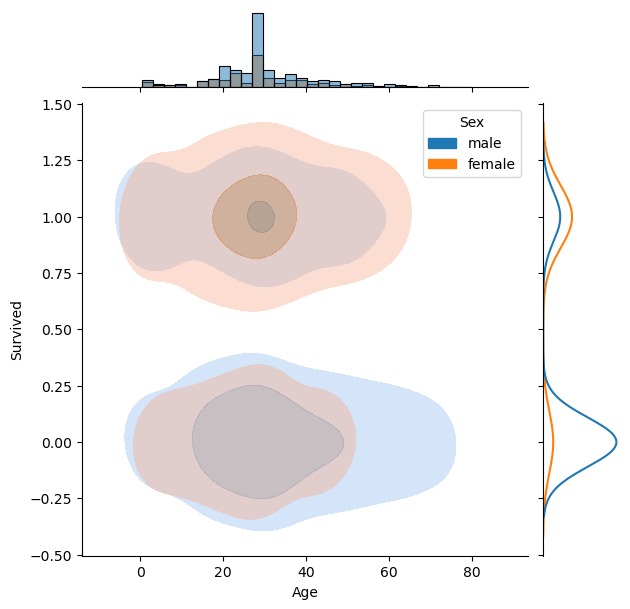

In [52]:
joint_grid = sns.JointGrid()
sns.kdeplot(data=titanixdata, x='Age', y='Survived', hue='Sex',fill=True, alpha=0.4, levels=3, ax=joint_grid.ax_joint)
sns.histplot(data=titanixdata, x='Age', hue='Sex', legend=False,ax=joint_grid.ax_marg_x)
sns.kdeplot(data=titanixdata, y='Survived', hue='Sex', legend=False,ax=joint_grid.ax_marg_y)

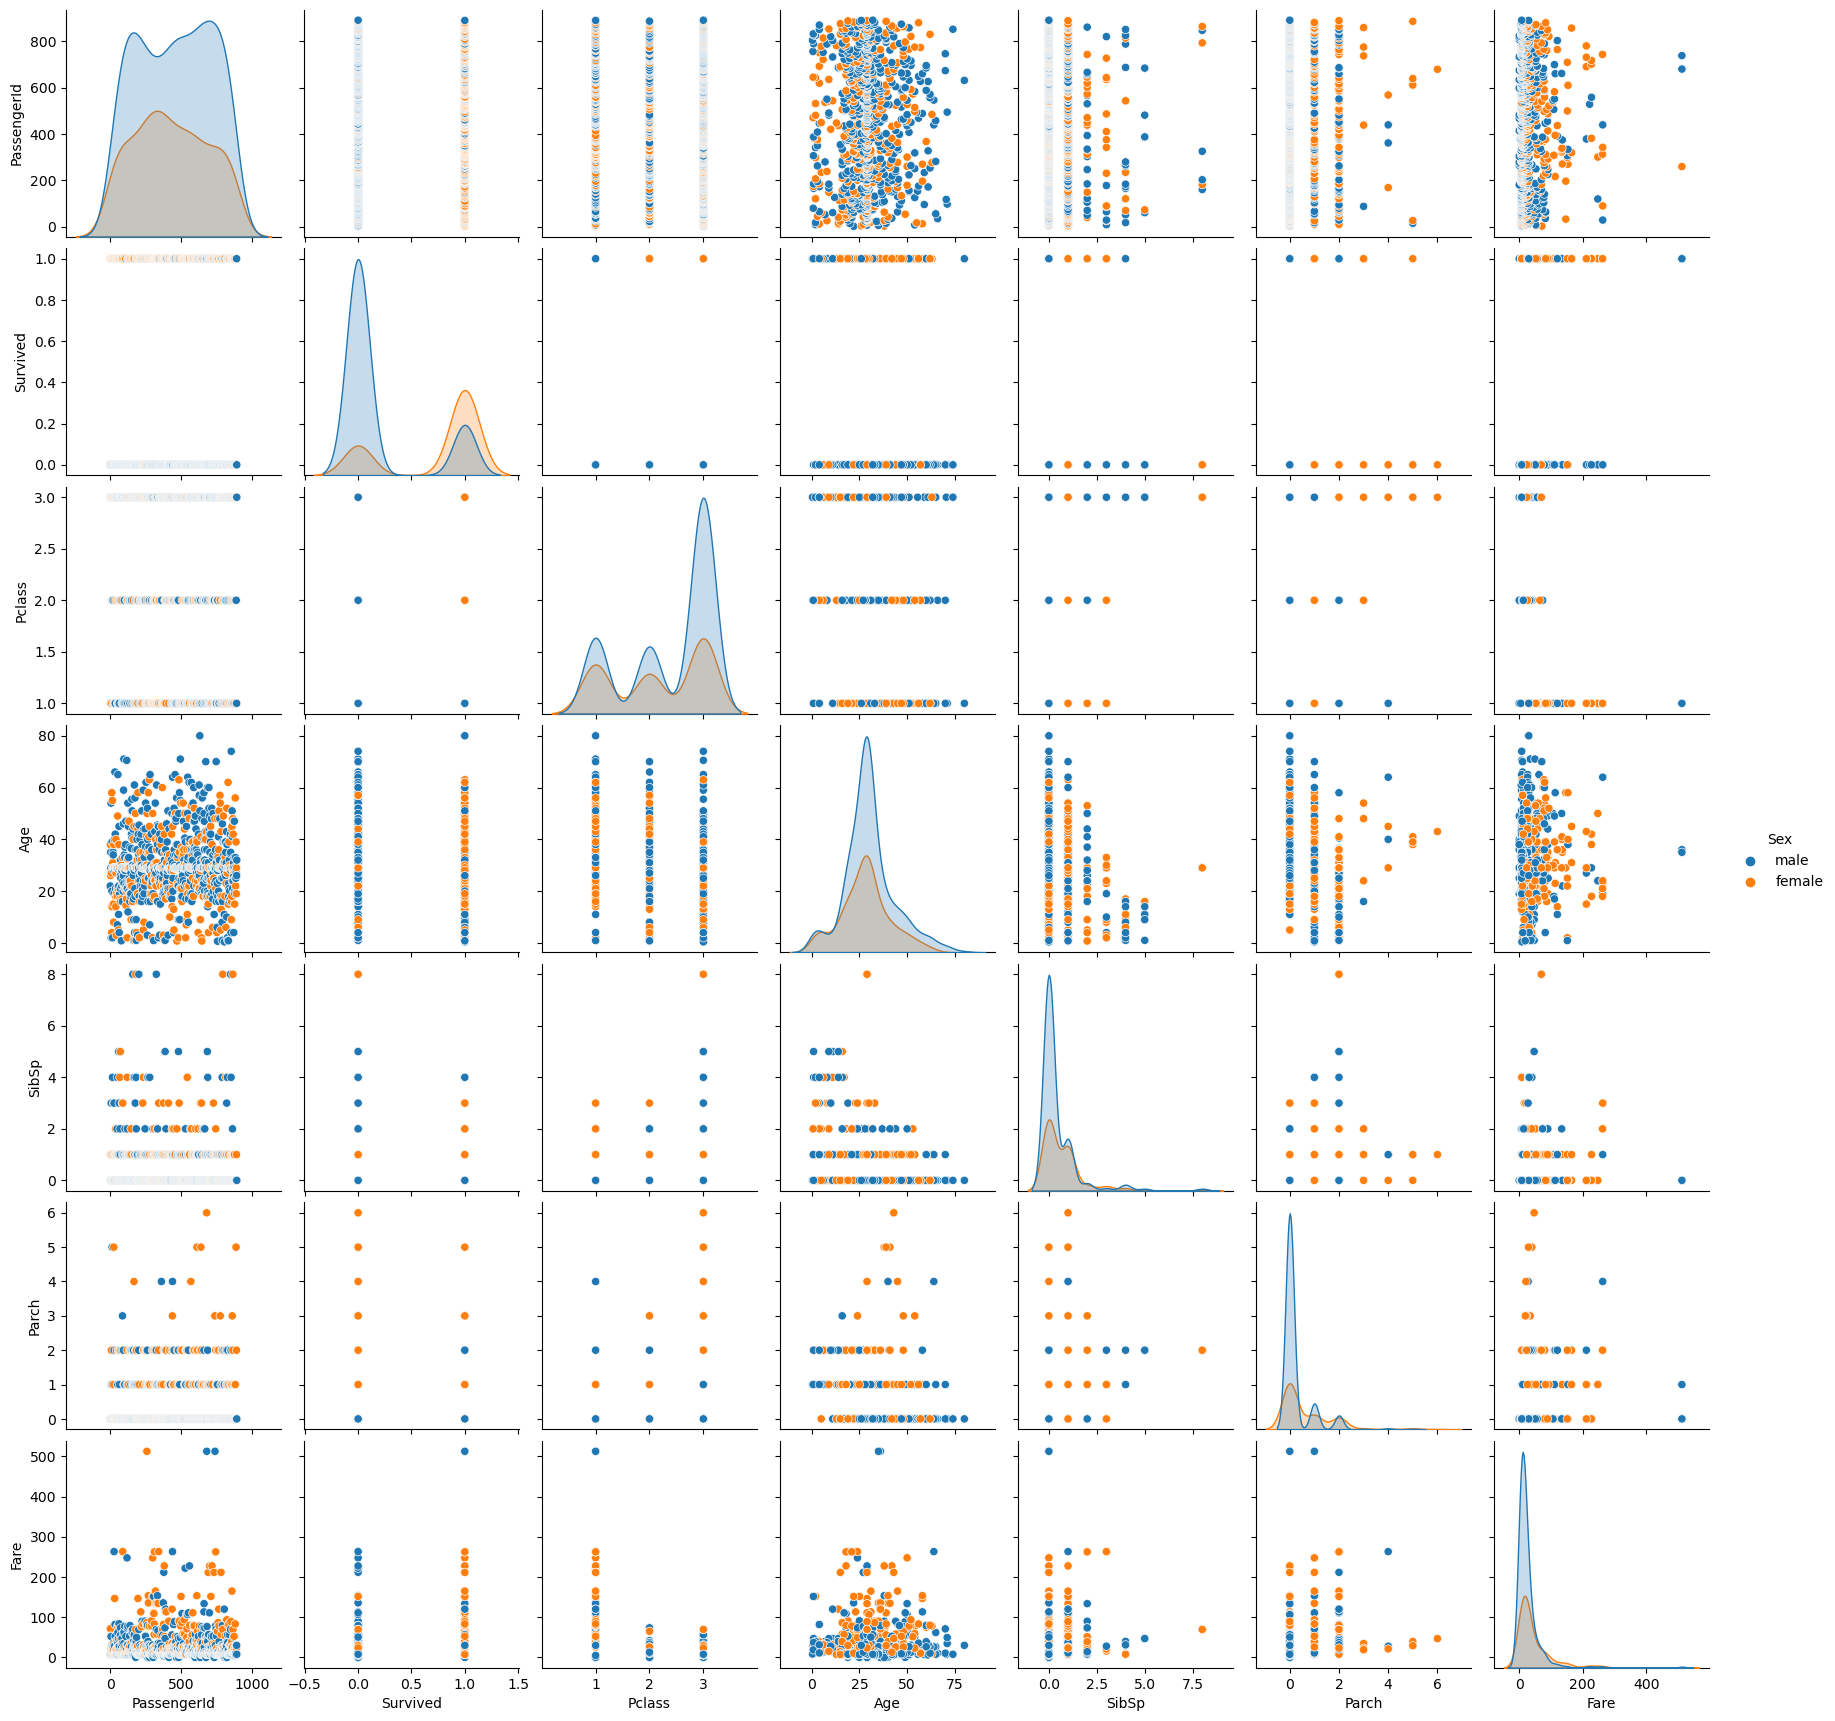

In [53]:
sns.pairplot(data=titanixdata, hue='Sex')


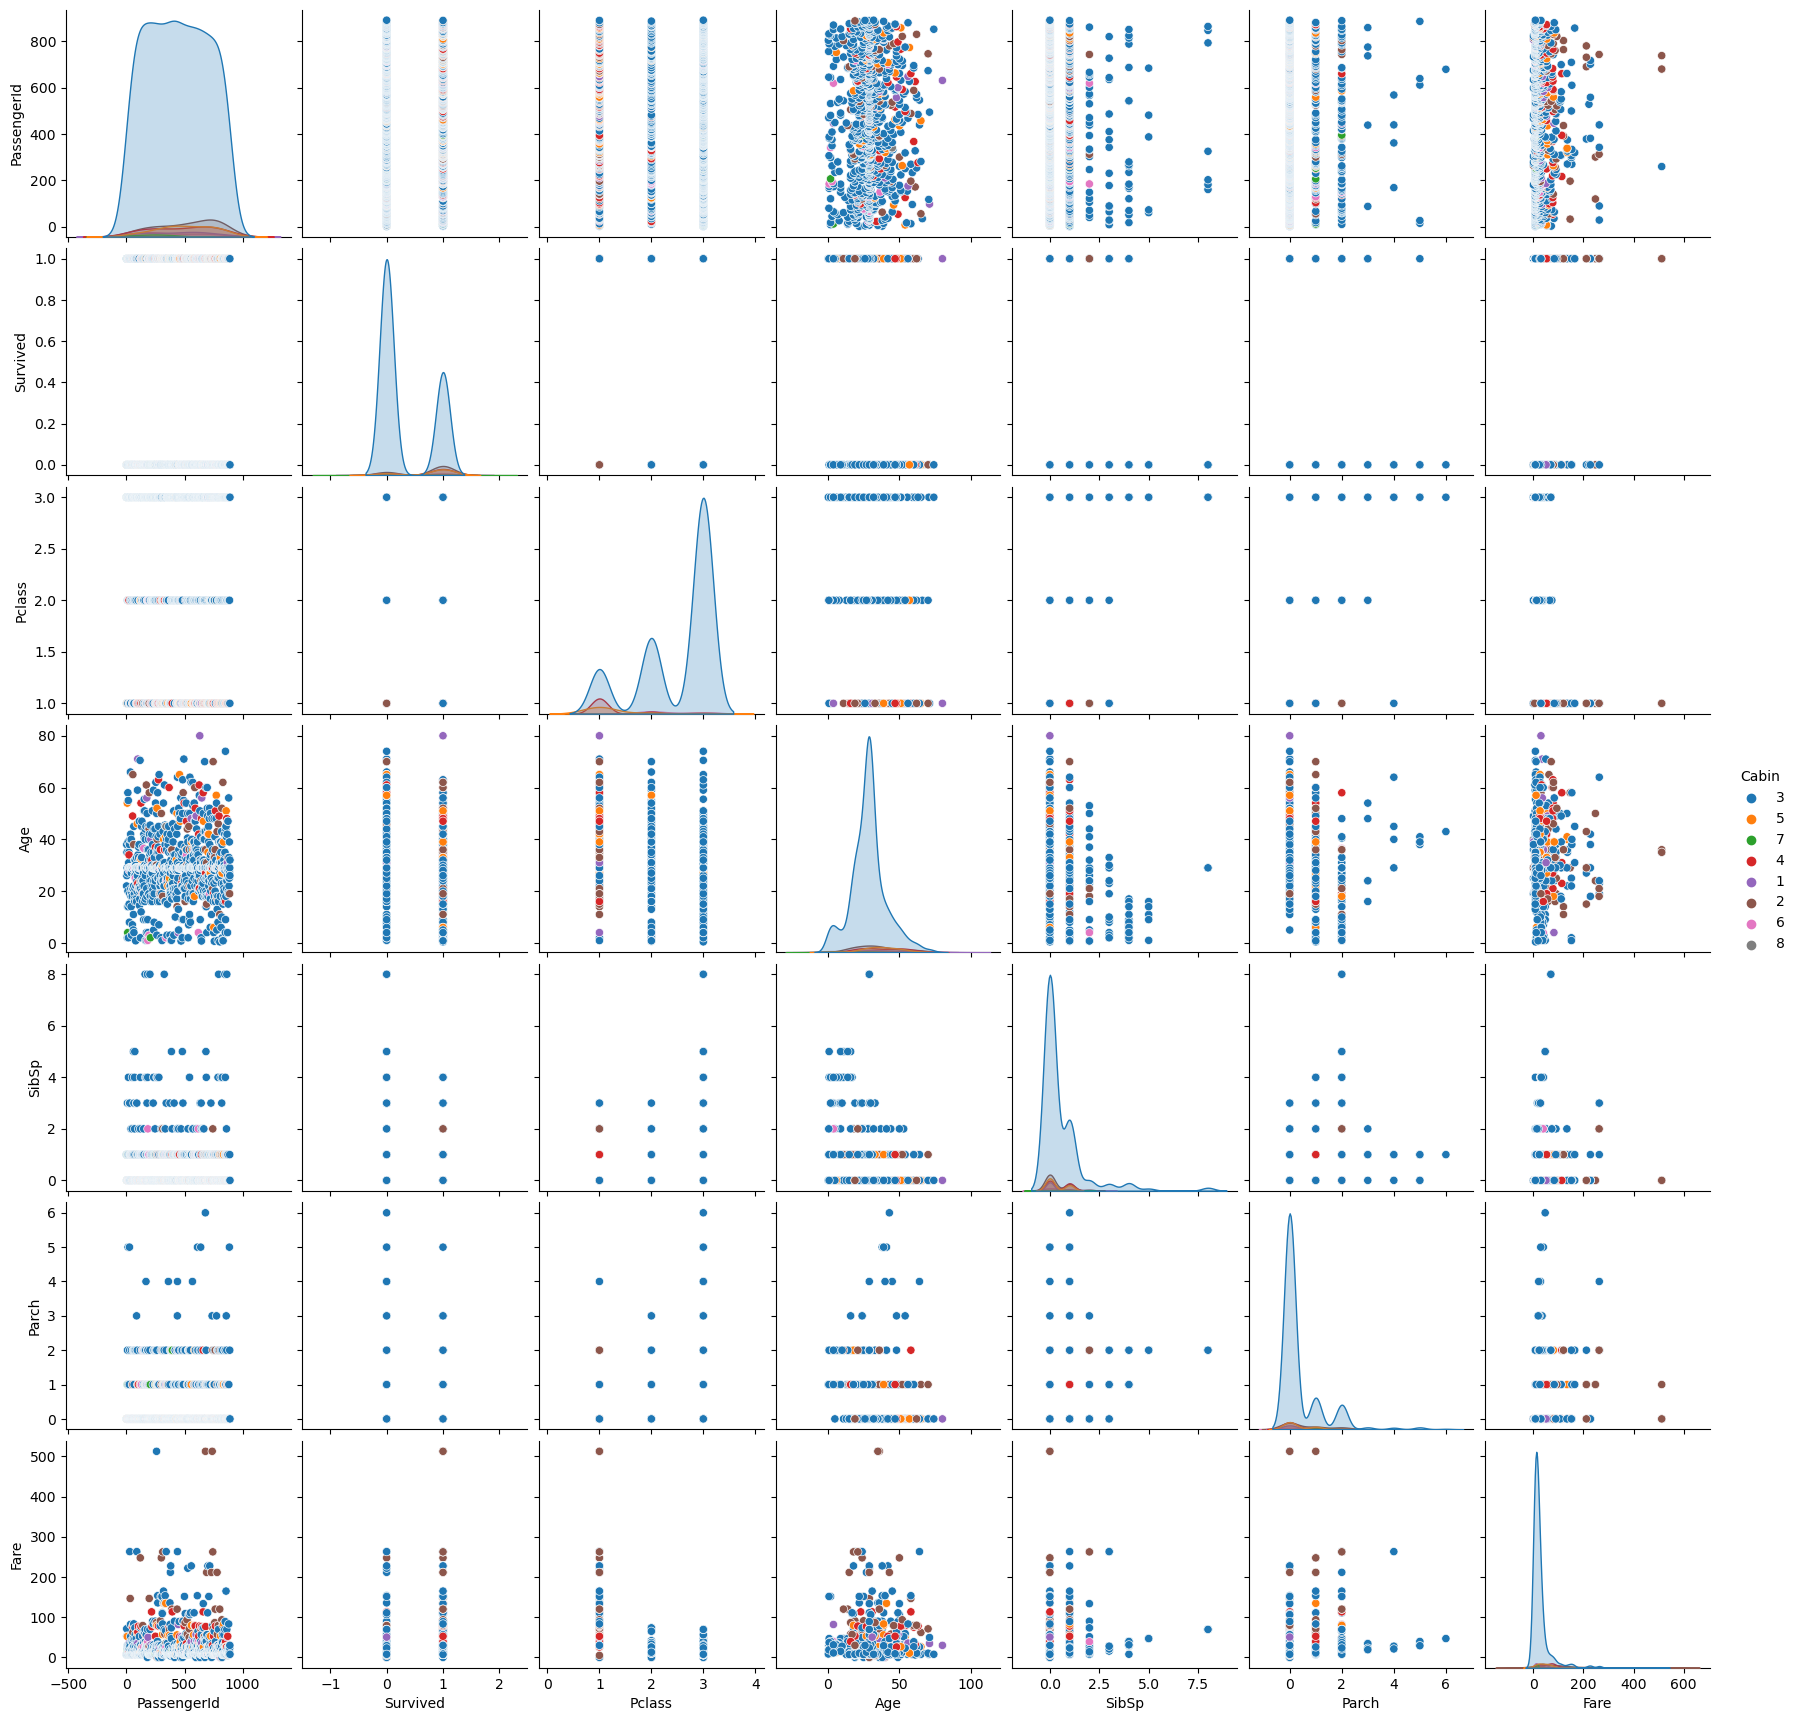

In [55]:
sns.pairplot(data=titanixdata, hue='Cabin')

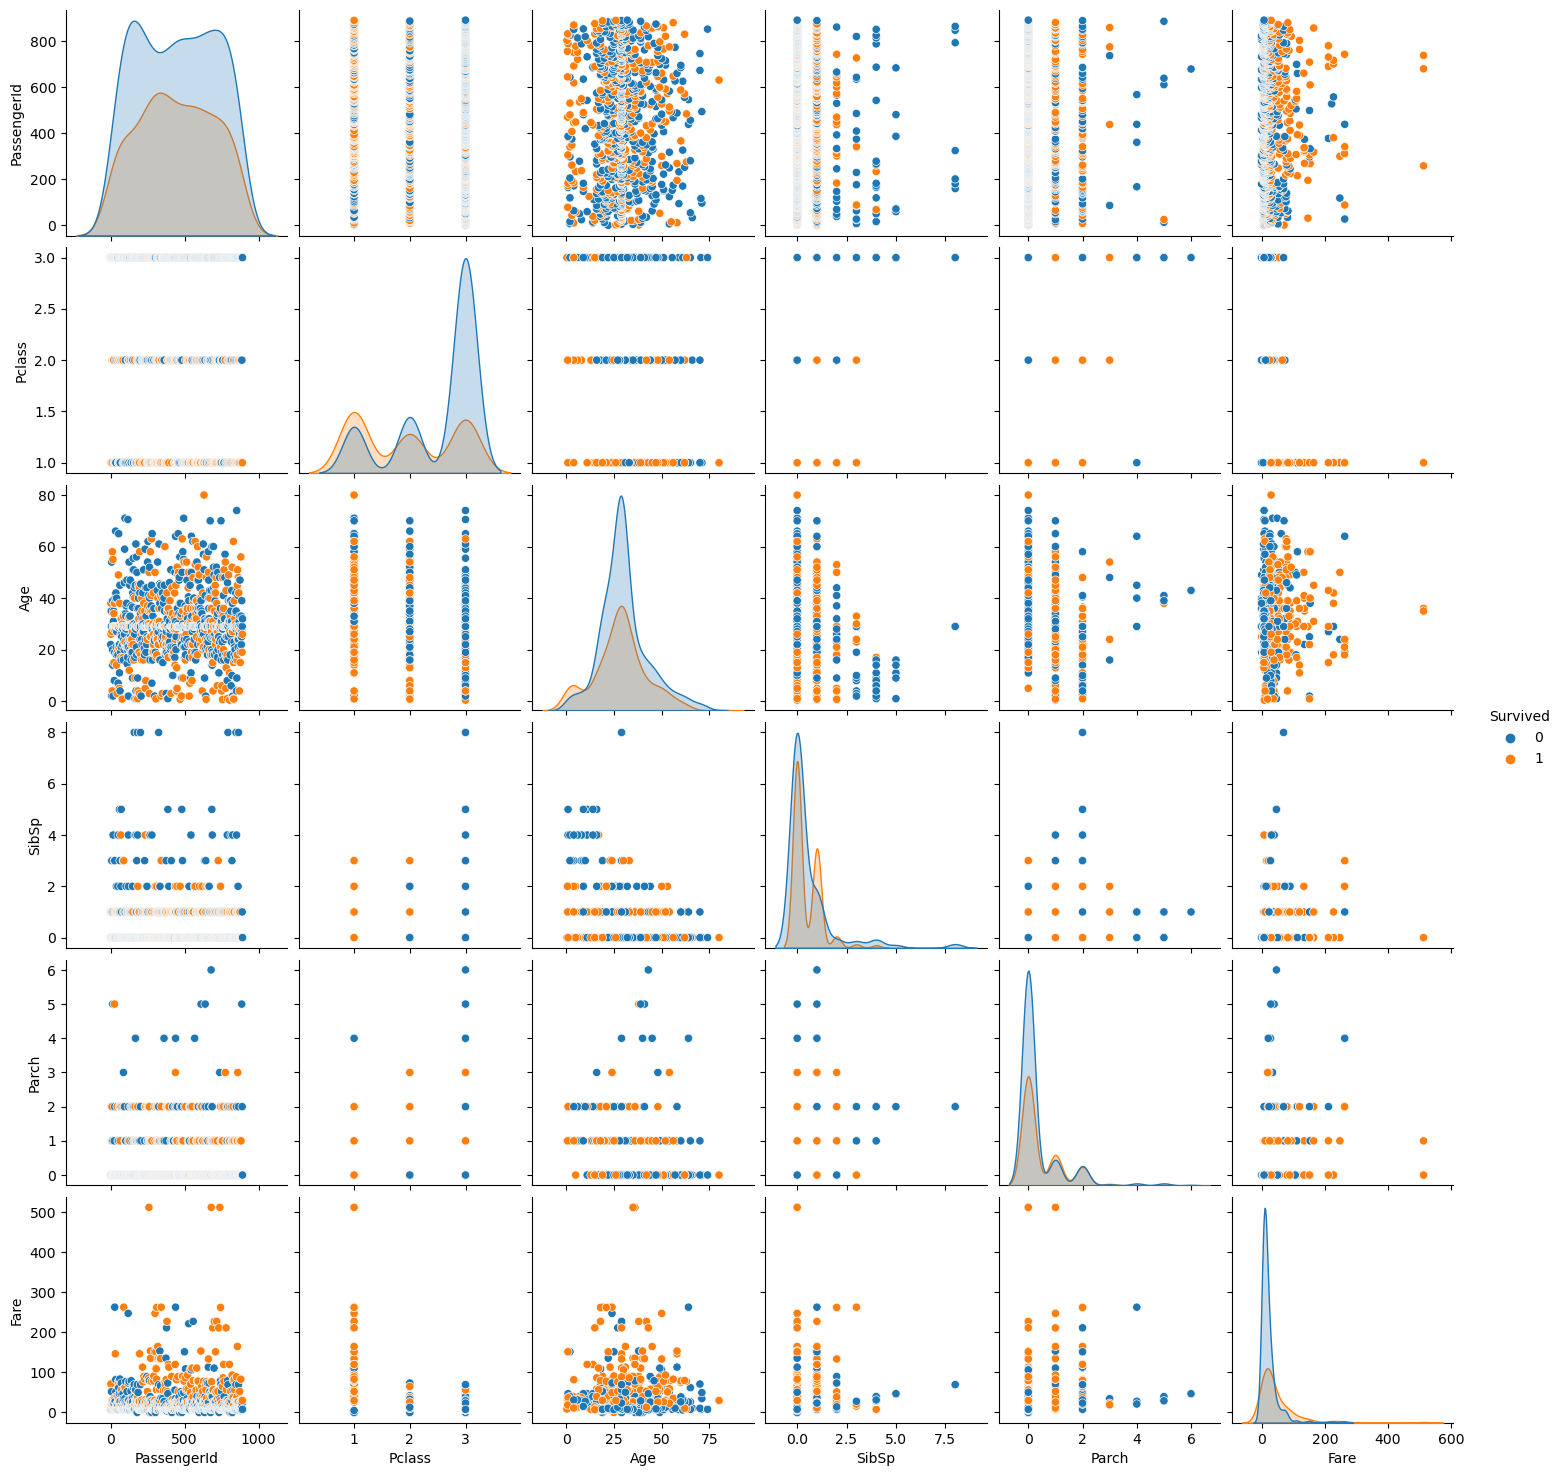

In [56]:
sns.pairplot(data=titanixdata, hue='Survived')

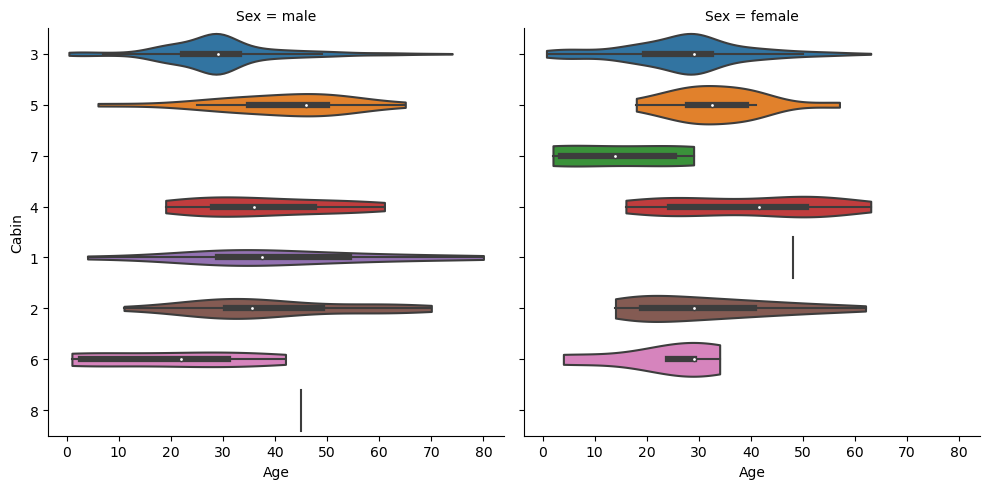

In [57]:
sns.catplot(data=titanixdata, x='Age', y='Cabin', col='Sex',kind='violin', orient='h', cut=0)

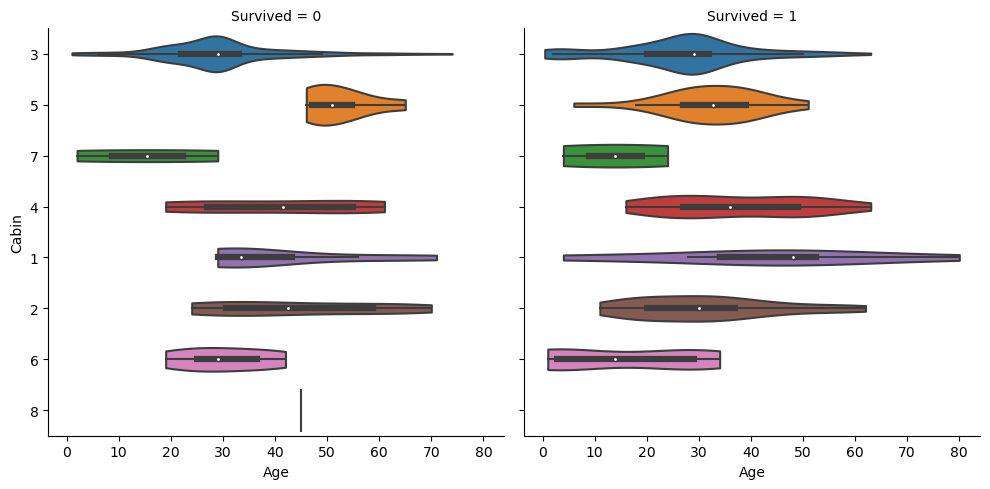

In [58]:
sns.catplot(data=titanixdata, x='Age', y='Cabin', col='Survived',kind='violin', orient='h', cut=0)

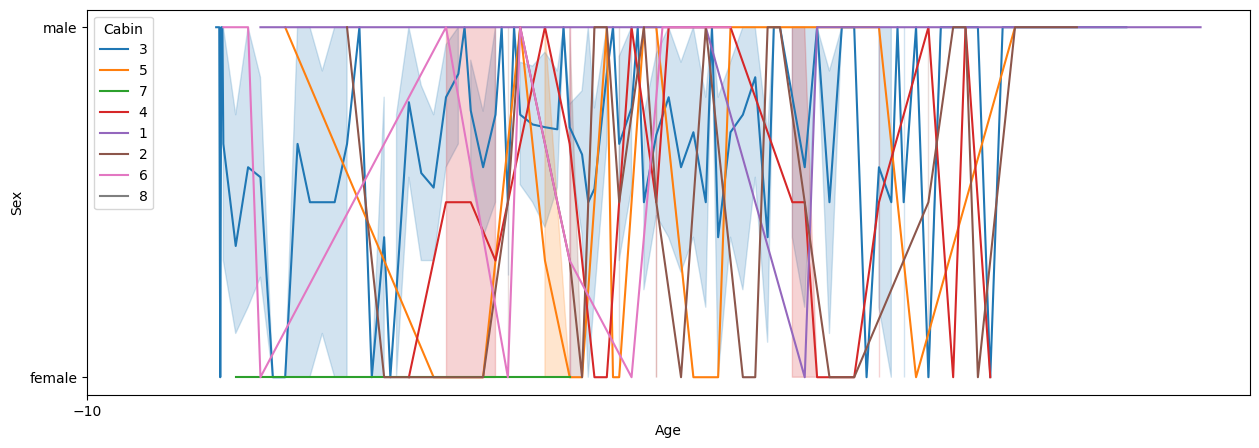

In [59]:
plt.figure(figsize=(15,5))
line_plot = sns.lineplot(data=titanixdata, x='Age', y='Sex',hue='Cabin', dashes=False)
xticks = line_plot.get_xticks()
line_plot.set_xticks(xticks[::40]);

In [60]:
def fix_sex(value):
    if value == 'male':
        return 0
    return 1

titanixdata['Sex'] = titanixdata['Sex'].map(fix_sex)
titanixdata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,3,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,3,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,3,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,3,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,3,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,3,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,2,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.0,1,2,W./C. 6607,23.4500,3,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,3,C


In [61]:
titanixdata.drop('Embarked', axis=1, inplace=True)
titanixdata.drop('Name', axis=1, inplace=True)
titanixdata.drop('Ticket', axis=1, inplace=True)
titanixdata

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,0,22.0,1,0,7.2500,3
1,2,1,1,1,38.0,1,0,71.2833,3
2,3,1,3,1,26.0,0,0,7.9250,3
3,4,1,1,1,35.0,1,0,53.1000,3
4,5,0,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,3
887,888,1,1,1,19.0,0,0,30.0000,2
888,889,0,3,1,29.0,1,2,23.4500,3
889,890,1,1,0,26.0,0,0,30.0000,3


In [62]:
X = titanixdata[titanixdata.columns[2:]]
y = titanixdata['Survived']

X.sample()
#y.sample()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
430,1,0,28.0,0,0,26.55,3


In [63]:

X_train, X_test_full, y_train, y_test_full = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_test_full, y_test_full, test_size=0.5)

array([<AxesSubplot: ylabel='0'>], dtype=object)

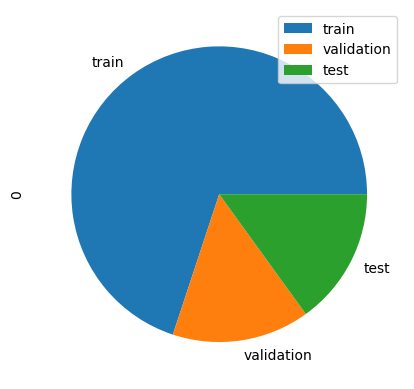

In [64]:
pd.DataFrame([len(y_train), len(y_val), len(y_test)], index=['train', 'validation', 'test']).plot(kind='pie', subplots=True)

<AxesSubplot: title={'center': 'test'}, ylabel='Survived'>

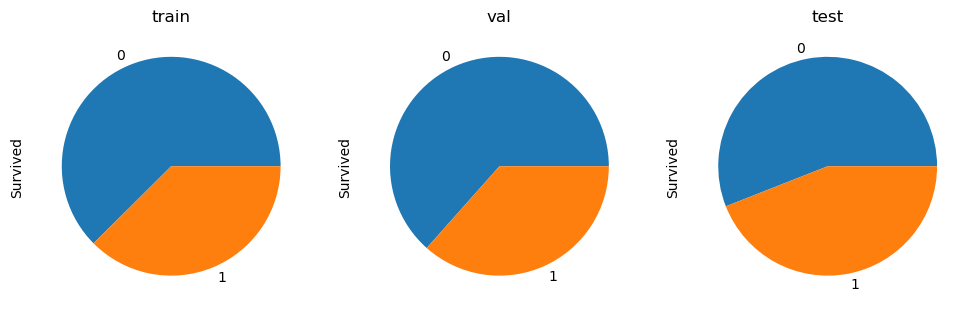

In [65]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))
y_train.value_counts().plot(kind='pie', ax=ax1, title='train')
y_val.value_counts().plot(kind='pie', ax=ax2, title='val')
y_test.value_counts().plot(kind='pie', ax=ax3, title='test')

# Baseline

In [66]:
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X_train, y_train)
y_pred = dummy_model.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2%}'.format(accuracy_score))

Accuracy: 55.97%


# Accuracy

In [67]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_val)
accuracy_score = metrics.accuracy_score(y_val, y_pred)
print('Accuracy: {:.2%}'.format(accuracy_score))

Accuracy: 77.61%


In [68]:
def train_and_find_best_depth(X_train, X_val, y_train, y_val, do_print):
    result = None
    accuracy_max = -1
    for curr_max_depth in range(1, 10):
        dt_model = DecisionTreeClassifier(max_depth=curr_max_depth)
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_val)
        accuracy_score = metrics.accuracy_score(y_val, y_pred)
        if accuracy_score >= accuracy_max:
            accuracy_max = accuracy_score
            result = curr_max_depth
        if do_print:
            print('max depth {}: {:.2%} accuracy on validation set.'.format(curr_max_depth, accuracy_score))
        if do_print:
            print('-' * 20)
            print('best max depth {} has {:.2%} accuracy.'.format(result,accuracy_max))
    return result

train_and_find_best_depth(X_train, X_val, y_train, y_val, True)

max depth 1: 76.87% accuracy on validation set.
--------------------
best max depth 1 has 76.87% accuracy.
max depth 2: 78.36% accuracy on validation set.
--------------------
best max depth 2 has 78.36% accuracy.
max depth 3: 80.60% accuracy on validation set.
--------------------
best max depth 3 has 80.60% accuracy.
max depth 4: 80.60% accuracy on validation set.
--------------------
best max depth 4 has 80.60% accuracy.
max depth 5: 79.85% accuracy on validation set.
--------------------
best max depth 4 has 80.60% accuracy.
max depth 6: 79.85% accuracy on validation set.
--------------------
best max depth 4 has 80.60% accuracy.
max depth 7: 79.10% accuracy on validation set.
--------------------
best max depth 4 has 80.60% accuracy.
max depth 8: 79.10% accuracy on validation set.
--------------------
best max depth 4 has 80.60% accuracy.
max depth 9: 79.10% accuracy on validation set.
--------------------
best max depth 4 has 80.60% accuracy.


4

## Confusion Matrix

In [69]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[54, 21],
       [33, 26]], dtype=int64)

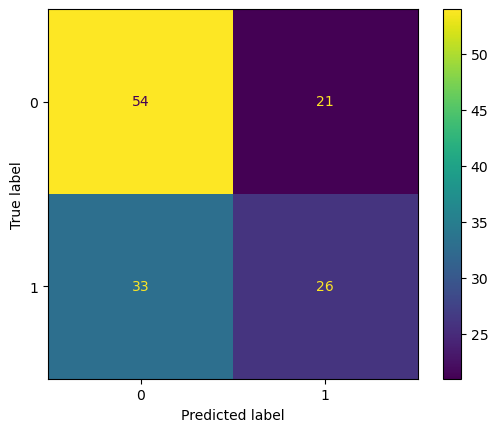

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

# Recall, Precision

In [71]:
recall = metrics.recall_score(y_test, y_pred)
recall

0.4406779661016949

In [72]:
precision = metrics.precision_score(y_test, y_pred)
precision

0.5531914893617021

In [73]:
f1_score = metrics.f1_score(y_test, y_pred)
f1_score

0.49056603773584906

In [74]:
dt_model = DecisionTreeClassifier(random_state=52)
dt_model.fit(X_train, y_train)
pred_y = dt_model.predict(X_test)
print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_test, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_test, y_pred)))
print('F1 Score: {:.2%}'.format(metrics.f1_score(y_test, y_pred)))

Accuracy: 59.70%
Recall: 44.07%
Precision: 55.32%
F1 Score: 49.06%
